# Probability-insighter
https://github.com/alvason/probability-insighter

Gaussian random distribution (standard normal distribution)

Previous running time is 2016-06-09 20:44:15.854152


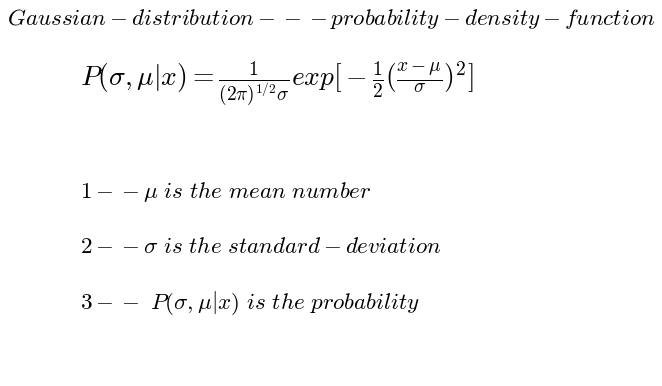

In [1]:
'''
author: Alvason Zhenhua Li
date:   03/19/2015
'''

%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt
import os

import alva_machinery_probability as alva

AlvaFontSize = 23
AlvaFigSize = (16, 7)
numberingFig = 0
# for saving figure
saving_dir_path = '/Users/al/Desktop/GitHub/probability-insighter/figure'
file_name = 'multinomial-distribution'

# plotting
figure_name = '-equation'
file_suffix = '.png'
save_figure = os.path.join(saving_dir_path, file_name + figure_name + file_suffix)

numberingFig = numberingFig + 1
plt.figure(numberingFig, figsize=(9, 6))
plt.axis('off')
plt.title(r'$ Gaussian-distribution---probability-density-function $',fontsize = AlvaFontSize)
plt.text(0, 5.0/6, r'$ P(\sigma, \mu|x) = \frac{1}{(2\pi)^{1/2}\sigma} exp[-\frac{1}{2}(\frac{x - \mu}{\sigma})^2] $',
         fontsize = 1.2*AlvaFontSize)
plt.text(0, 3.0/6, r'$ 1-- \mu \ is \ the \ mean \ number $',
         fontsize = AlvaFontSize)
plt.text(0, 2.0/6, r'$ 2-- \sigma \ is \ the \ standard-deviation \  $', fontsize = AlvaFontSize)
plt.text(0, 1.0/6, r'$ 3-- \ P(\sigma, \mu|x) \ is \ the \ probability  $',
         fontsize = AlvaFontSize)
plt.savefig(save_figure, dpi = 300)
plt.show()

total-probability = 0.999131318925


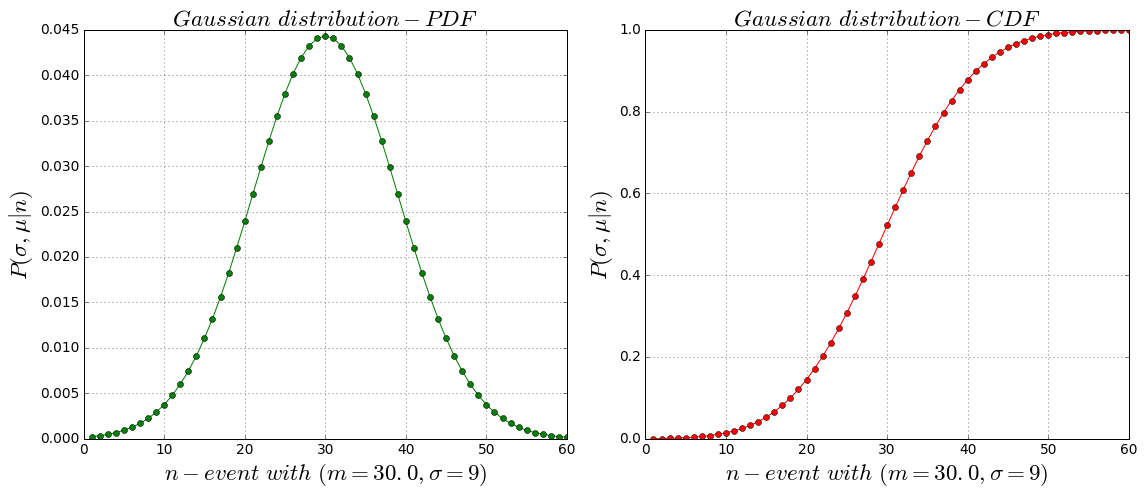

In [2]:
def gaussianPMF(total_event, meanP, deviationP):
    x_event = np.arange(1, total_event + 1)
    constantD = (2*np.pi)**(0.5) * deviationP
    constantN = 1.0 / constantD
    y_PMF = constantN * np.exp(-(0.5)*((x_event - meanP)/deviationP)**2)
    return np.array([x_event, y_PMF])

total_event = int(60)
meanP = total_event/2.0
deviationP = 9

gaussian_PMF = gaussianPMF(total_event, meanP, deviationP)
gaussian_CDF = np.array([gaussian_PMF[0], np.cumsum(gaussian_PMF[1])])

print ('total-probability = {:}'.format(gaussian_PMF[1].sum()))
figure_name = '-distribution-pmf-cdf'
file_suffix = '.png'
save_figure = os.path.join(saving_dir_path, file_name + figure_name + file_suffix)
numberingFig = numberingFig + 1
# plotting1
figure = plt.figure(numberingFig, figsize = AlvaFigSize)
plot1 = figure.add_subplot(1, 2, 1)
plot1.plot(gaussian_PMF[0], gaussian_PMF[1], marker ='o', color = 'green')
plt.title(r'$ Gaussian \ distribution-PDF $', fontsize = AlvaFontSize)
plt.xlabel(r'$ n-event \ with \ (m = {:}, \sigma = {:}) $'.format(meanP, deviationP), fontsize = AlvaFontSize)
plt.ylabel(r'$ P(\sigma, \mu|n) $', fontsize = AlvaFontSize)
plt.xticks(fontsize = AlvaFontSize*0.6)
plt.yticks(fontsize = AlvaFontSize*0.6) 
plt.grid()
# plotting2

plot2 = figure.add_subplot(1, 2, 2)
plot2.plot(gaussian_CDF[0], gaussian_CDF[1], marker ='o', color = 'red')
plt.title(r'$ Gaussian \ distribution-CDF $', fontsize = AlvaFontSize)
plt.xlabel(r'$ n-event \ with \ (m = {:}, \sigma = {:}) $'.format(meanP, deviationP), fontsize = AlvaFontSize)
plt.ylabel(r'$ P(\sigma, \mu|n) $', fontsize = AlvaFontSize)
plt.xticks(fontsize = AlvaFontSize*0.6)
plt.yticks(fontsize = AlvaFontSize*0.6) 
plt.grid()
figure.tight_layout()
plt.show()

total-probability = 1.000000


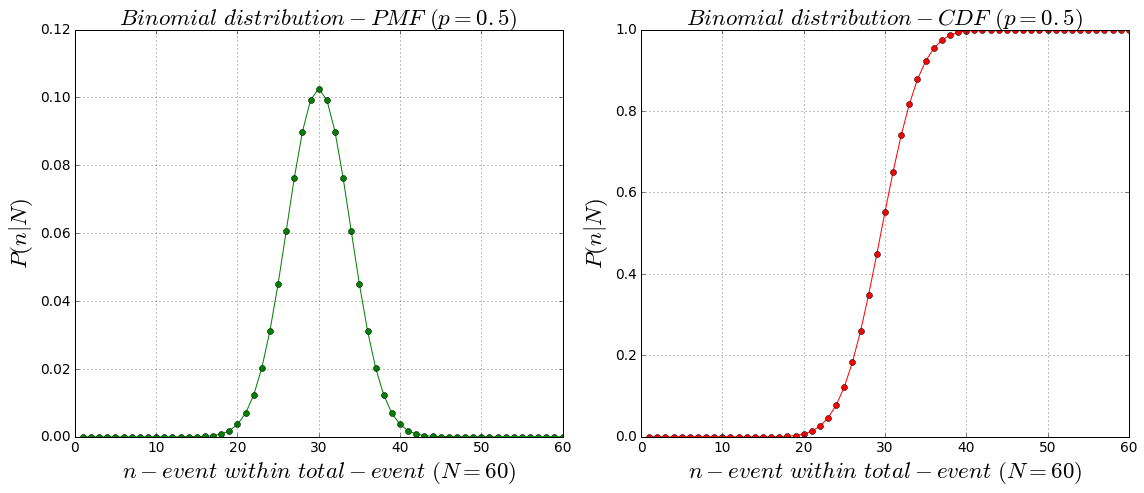

In [3]:
def binomialPMF(total_event, p):
    x_event = np.arange(1, total_event + 1)
    y_PMF = alva.productA(total_event) / (alva.productA(x_event) * alva.productA(total_event - x_event)) \
                        * p**x_event * (1 - p)**(total_event - x_event)
    return np.array([x_event, y_PMF])


total_event = int(60)
p = 0.5

binomial_PMF = binomialPMF(total_event, p)
print ('total-probability = {:f}'.format(binomial_PMF[1].sum()))
# plotting1
figure = plt.figure(numberingFig, figsize = AlvaFigSize)
plot1 = figure.add_subplot(1, 2, 1)
plot1.plot(binomial_PMF[0], binomial_PMF[1], marker ='o', color = 'green')
plt.title(r'$ Binomial \ distribution-PMF \ (p={:}) $'.format(p), fontsize = AlvaFontSize)
plt.xlabel(r'$ n-event \ within \ total-event \ (N={:}) $'.format(total_event), fontsize = AlvaFontSize)
plt.ylabel(r'$ P(n|N) $', fontsize = AlvaFontSize)
plt.xticks(fontsize = AlvaFontSize*0.6)
plt.yticks(fontsize = AlvaFontSize*0.6)  
plt.grid()
# plotting2
binomial_CDF = np.array([binomial_PMF[0], np.cumsum(binomial_PMF[1])])
plot2 = figure.add_subplot(1, 2, 2)
plot2.plot(binomial_CDF[0], binomial_CDF[1], marker ='o', color = 'red')
plt.title(r'$ Binomial \ distribution-CDF \ (p={:}) $'.format(p), fontsize = AlvaFontSize)
plt.xlabel(r'$ n-event \ within \ total-event \ (N={:}) $'.format(total_event), fontsize = AlvaFontSize)
plt.ylabel(r'$ P(n|N) $', fontsize = AlvaFontSize)
plt.xticks(fontsize = AlvaFontSize*0.6)
plt.yticks(fontsize = AlvaFontSize*0.6)  
plt.grid()
figure.tight_layout()
plt.show()

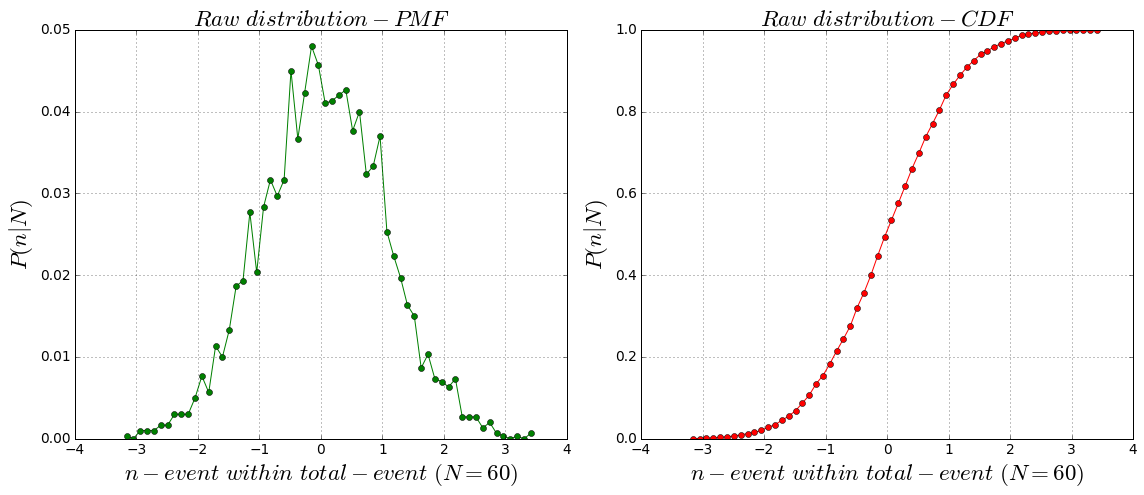

In [4]:
raw_data = np.random.standard_normal(size = 3000)
raw_data = np.random.normal(size = 3000)
raw_PMF = alva.AlvaPDF(raw_data, total_level = total_event, empty_leveler_filter = False)
raw_CDF = np.array([raw_PMF[0], np.cumsum(raw_PMF[1])])
# plotting1
figure = plt.figure(numberingFig, figsize = AlvaFigSize)
plot1 = figure.add_subplot(1, 2, 1)
plot1.plot(raw_PMF[0], raw_PMF[1], marker ='o', color = 'green')
plt.title(r'$ Raw \ distribution-PMF $', fontsize = AlvaFontSize)
plt.xlabel(r'$ n-event \ within \ total-event \ (N={:}) $'.format(len(raw_PMF[0])), fontsize = AlvaFontSize)
plt.ylabel(r'$ P(n|N) $', fontsize = AlvaFontSize)
plt.xticks(fontsize = AlvaFontSize*0.6)
plt.yticks(fontsize = AlvaFontSize*0.6)  
plt.grid()
# plotting2
plot2 = figure.add_subplot(1, 2, 2)
plot2.plot(raw_CDF[0], raw_CDF[1], marker ='o', color = 'red')
plt.title(r'$ Raw \ distribution-CDF $', fontsize = AlvaFontSize)
plt.xlabel(r'$ n-event \ within \ total-event \ (N={:}) $'.format(total_event), fontsize = AlvaFontSize)
plt.ylabel(r'$ P(n|N) $', fontsize = AlvaFontSize)
plt.xticks(fontsize = AlvaFontSize*0.6)
plt.yticks(fontsize = AlvaFontSize*0.6)  
plt.grid()
figure.tight_layout()
plt.show()

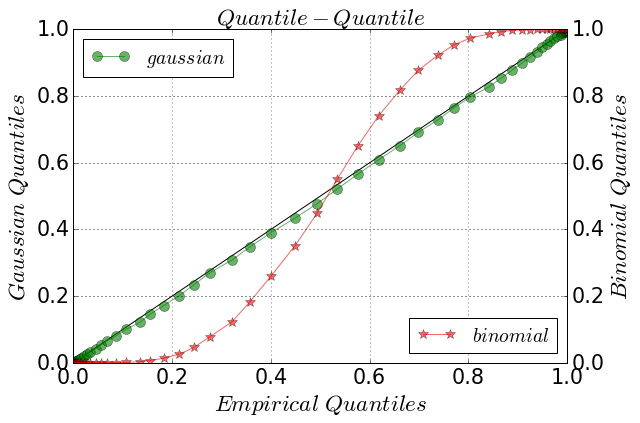

In [5]:
### plotting (quantile-quantile)
figure_name = '-distribution-quantile'
file_suffix = '.png'
save_figure = os.path.join(saving_dir_path, file_name + figure_name + file_suffix)
numberingFig = numberingFig + 1
figure = plt.figure(numberingFig, figsize = (9, 6))
window = figure.add_subplot(1, 1, 1)
window.set_title(r'$ Quantile-Quantile $', fontsize = AlvaFontSize)
### boundary line
window.plot(np.arange(0, 1, 0.001), np.arange(0, 1, 0.001), color = 'black', linewidth = 1)
### model[0] ###
window.plot(raw_CDF[1], gaussian_CDF[1], marker = 'o', markersize = 10, color = 'green', alpha = 0.6
            , label = '$ gaussian $')
###
window.set_xlabel('$ Empirical \ Quantiles $', fontsize = AlvaFontSize)
window.set_ylabel('$ Gaussian \ Quantiles $', fontsize = AlvaFontSize)
plt.xticks(fontsize = AlvaFontSize*0.9) 
plt.yticks(fontsize = AlvaFontSize*0.9) 
window.grid(True) 
window.legend(loc = 'upper left', fontsize = AlvaFontSize*0.85) 
### model[1] ###
plot2 = window.twinx()
plot2.plot(raw_CDF[1], binomial_CDF[1], marker = '*', markersize = 10, color = 'red', alpha = 0.6
           , label = '$ binomial $')
plot2.set_ylabel('$ Binomial \ Quantiles $', fontsize = AlvaFontSize)
plt.xticks(fontsize = AlvaFontSize*0.9) 
plt.yticks(fontsize = AlvaFontSize*0.9) 
plot2.grid(True) 
plot2.legend(loc = 'lower right', fontsize = AlvaFontSize*0.85) 
figure.tight_layout() 
plt.savefig(save_figure, dpi = 300, bbox_inches = 'tight')
plt.show()

max-events/level = 32.0


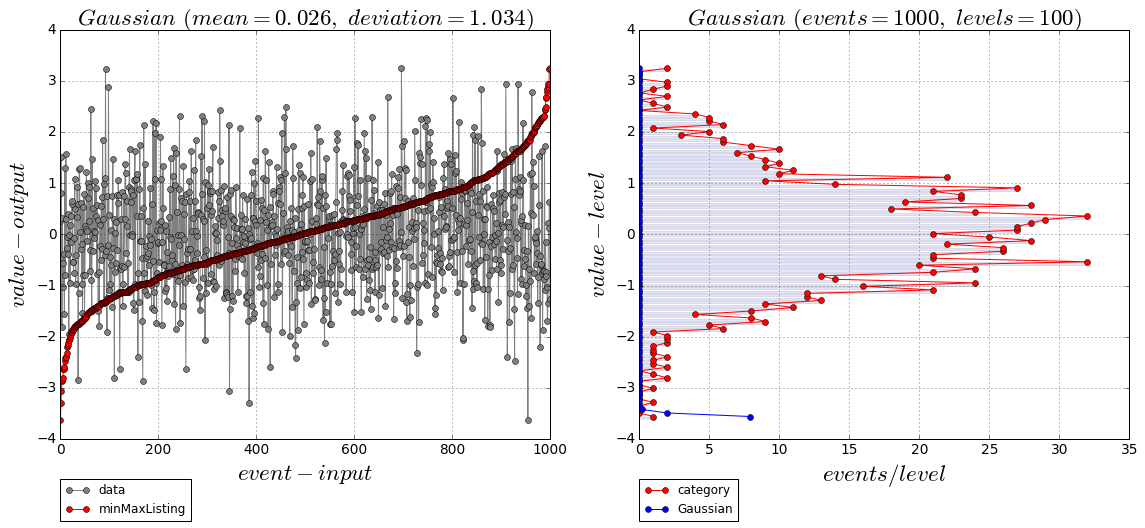

In [6]:
'''Gaussian randomness --- Gaussian distribution --- Standard normal distribution'''

total_event = int(1000)
gInput = np.arange(total_event)
randomSeed = np.random.standard_normal(total_event)

sumP = 0
for i in range(total_event):
    sumP = sumP + randomSeed[i]
meanP = sumP/(total_event)

sumP = 0
for i in range(total_event):
    sumP = sumP + (meanP - randomSeed[i])**2
deviationP = (sumP/total_event)**(1.0/2)

totalLevel = int(total_event/10)
category = alva.AlvaLevel(randomSeed, totalLevel, False)
gLevel = category[0]
numberLevel = category[1]

maxEvent_per_level = alva.AlvaMinMax(numberLevel)[-1]
print ('max-events/level = {:}'.format(maxEvent_per_level))
gaussian_D = maxEvent_per_level * gaussianPMF(len(gLevel), meanP, deviationP)[1]

# plotting
figure_name = ''
file_suffix = '.png'
save_figure = os.path.join(saving_dir_path, file_name + figure_name + file_suffix)

numberingFig = numberingFig + 1
figure = plt.figure(numberingFig, figsize = AlvaFigSize)
plot1 = figure.add_subplot(1, 2, 1)
plot1.plot(gInput, randomSeed, color = 'gray', marker = 'o', label = 'data')
plot1.plot(gInput, alva.AlvaMinMax(randomSeed), color = 'red', marker = 'o', label = 'minMaxListing')
if total_event < 100:
    plot1.set_xticks(gInput, minor = True) 
    plot1.set_yticks(randomSeed, minor = True)
    plot1.grid(True, which = 'minor')
else:
    plot1.grid(True, which = 'major')
plt.title(r'$ Gaussian \ (mean = {:1.3f},\ deviation = {:1.3f}) $'.format(meanP, deviationP),
          fontsize = AlvaFontSize)
plt.xlabel(r'$ event-input $', fontsize = AlvaFontSize)
plt.ylabel(r'$ value-output $', fontsize = AlvaFontSize)
plt.xticks(fontsize = AlvaFontSize*0.6)
plt.yticks(fontsize = AlvaFontSize*0.6) 
plt.legend(loc = (0, -0.2))

plot2 = figure.add_subplot(1, 2, 2)
plot2.plot(numberLevel, gLevel, color = 'red', marker = 'o', label = 'category')
plot2.plot(gaussian_D, gLevel, color = 'blue', marker = 'o', label = 'Gaussian') 
plot2.hist(randomSeed, bins = totalLevel, alpha = 0.1, orientation = 'horizontal', rwidth = 0.6)
if total_event < 100:
    plot2.set_xticks(numberLevel, minor = True) 
    plot2.set_yticks(gLevel, minor = True)
    plot2.grid(True, which = 'minor')
else:
    plot2.grid(True, which = 'major')
plt.title(r'$ Gaussian \ (events = {:},\ levels = {:}) $'.format(total_event, totalLevel)
          , fontsize = AlvaFontSize)
plt.xlabel(r'$ events/level $', fontsize = AlvaFontSize)
plt.ylabel(r'$ value-level $', fontsize = AlvaFontSize)
plt.xticks(fontsize = AlvaFontSize*0.6)
plt.yticks(fontsize = AlvaFontSize*0.6) 
plt.legend(loc = (0, -0.2))

figure.tight_layout()
plt.savefig(save_figure, dpi = 300)
plt.show()

In [7]:
def AlvaIntegrateArea(out_i, min_i, max_i, totalGPoint_i):
    spacing_i = np.linspace(min_i, max_i, num = totalGPoint_i, retstep = True)
    grid_i = spacing_i[0]
    dx = spacing_i[1]
    outArea = np.sum(out_i(grid_i[:]))*dx
    return (outArea)

def gaussianA(i):
    inOut = np.exp(-i**2)
    return (inOut)

ggg = AlvaIntegrateArea(gaussianA, -10, 10, 100)
print ggg
ppp = (np.pi)**(1.0/2)
print ppp


1.77245385091
1.77245385091
